#Bibliotecas

In [1]:
import wave
import pylab
import matplotlib as plt
import numpy as np
from scipy.signal import resample

import tensorflow as tf
from tensorflow import keras
# from keras import layers
from tensorflow.keras.layers import LSTM, Dense, Dropout, SimpleRNN, RNN
from keras import backend, optimizers
from sklearn import preprocessing
# from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.models import Model
from keras.layers import Input
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, Dropout, LayerNormalization, GlobalAveragePooling1D, GlobalAveragePooling2D
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
import matplotlib.pyplot as plt
import librosa

In [3]:
#Carrega os dados de treino 80% e teste 20%, já normalizados (valores entre 0 e 1)
X_train = np.load('x_train.npy')
X_test = np.load('x_test.npy')

Y_train = np.load('y_train.npy')
Y_test = np.load('y_test.npy')

## Classificação com extração de features

### extração de features MFCC dos dados de treinamento

In [16]:
# Parâmetros para extração de MFCC
n_mfcc = 2  # Número de coef. MFCC

mfcc_features = [] # lista para armazenar os MFCCs

#percorre todos os exemplos de áudio dos dados de treinamento
for i in range(X_train.shape[0]):
    signal = X_train[i, :, 0] #pega o exemplo de áudio atual

    mfcc = librosa.feature.mfcc(y=signal, sr=2500, n_mfcc=n_mfcc) #extração de features
    mfcc = mfcc.T  # Cada linha é um vetor de MFCCs
    mfcc_features.append(mfcc) #coloca na lista de features


X_train_mfcc = np.array(mfcc_features) # Converte a lista de features em um array 3D

print("Forma do array de MFCCs (exemplos, colunas, linhas):", X_train_mfcc.shape)

Forma do array de MFCCs (exemplos, colunas, linhas): (624, 15, 2)


### Extração de features dos dados de teste

In [15]:
# Parâmetros para extração de MFCC
n_mfcc = 2  # Número de coef. MFCC

mfcc_features = [] # lista para armazenar os MFCCs

#percorre todos os exemplos de áudio dos dados de teste
for i in range(X_test.shape[0]):
    signal = X_test[i, :, 0] #pega o exemplo de áudio atual

    mfcc = librosa.feature.mfcc(y=signal, sr=2500, n_mfcc=n_mfcc) #extração de features
    mfcc = mfcc.T  # Cada linha é um vetor de MFCCs
    mfcc_features.append(mfcc) #coloca na lista de features


X_teste_mfcc = np.array(mfcc_features) # Converte a lista de features em um array 3D

print("Forma do array de MFCCs (exemplos, colunas, linhas):", X_teste_mfcc.shape)

Forma do array de MFCCs (exemplos, colunas, linhas): (156, 15, 2)


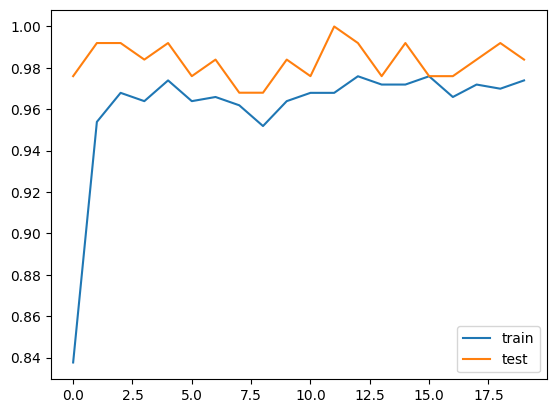

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 15, 2)]           0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                17152     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17217 (67.25 KB)
Trainable params: 17217 (67.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [48]:
lr = 0.005 #learning rate
unit = 64 #unidades ocultas

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=erro,mode='auto',restore_best_weights=True,)
loss_fn = keras.losses.categorical_crossentropy

neuronios_cam_densa = 1 #neurônio na camada de saída

Entrada = Input(shape=[X_train_mfcc.shape[1], X_train_mfcc.shape[2]])

LSTM_gesto = LSTM(unit,return_sequences=False)(Entrada) #cria camada LSTM
output = Dense(neuronios_cam_densa, activation='sigmoid')(LSTM_gesto)

model = Model(inputs=Entrada, outputs=output)
opt = keras.optimizers.Adam(learning_rate=lr)  #método de otimização
model.compile(optimizer=opt, loss=BinaryCrossentropy(), metrics=[BinaryAccuracy()])


#treinamento da rede
history = model.fit(
    X_train_mfcc, Y_train,
    epochs=20, #número de épocas de treinamento
    validation_split=0.2, #separa 20% dos dados de treinamento para utilizar como validação da rede
    shuffle = False,
    verbose= False
)

#plot treinamento
plt.plot(history.history['binary_accuracy'], label='train')
plt.plot(history.history['val_binary_accuracy'], label='test')
plt.legend()
plt.show()

#print do modelo
print(model.summary())

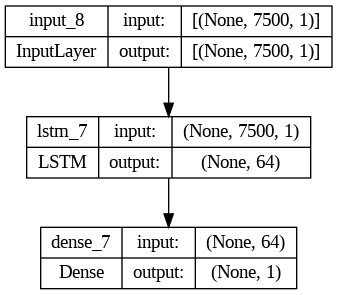

In [55]:
#plot do modelo
tf.keras.utils.plot_model(model, show_shapes=True)

In [49]:
loss, acc = model.evaluate(X_teste_mfcc, Y_test,verbose=False) #Acurácia OK
print("")
print("Acurácia do conjunto de teste",acc)


Acurácia do conjunto de teste 0.9807692170143127


# Teste de exemplos individuais

*   if zero: classe 0 (nao é som de ambulância).
*   if 1, classe 1 (som de ambulância)


In [19]:
y_pred = model.predict(X_teste_mfcc[1:2])
y_pred[0][0]

1/1 [==============================] - 0s 331ms/step


0.021419436

# Plota um exemplo 1 de teste: features mfcc


*   dados mfcc: 156 exemplos, 15 colunas e 13 linhas



shape (156, 15, 2)
 


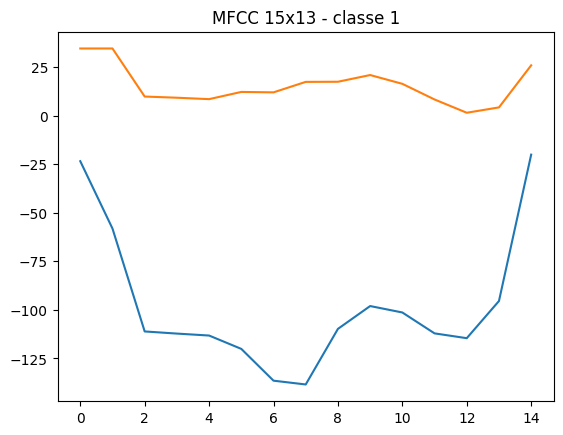

In [20]:
print("shape",X_teste_mfcc.shape)
print(" ")
plt.plot(X_teste_mfcc[0]);
plt.title("MFCC 15x13 - classe 1");

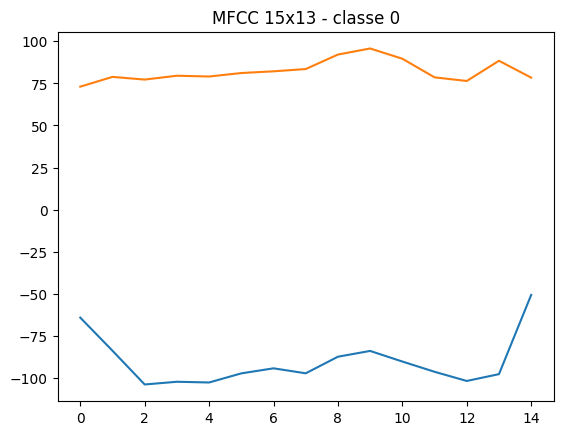

In [21]:
plt.plot(X_teste_mfcc[1]);
plt.title("MFCC 15x13 - classe 0");

## Classificação sem extração de features MFCC dos dados de treinamento

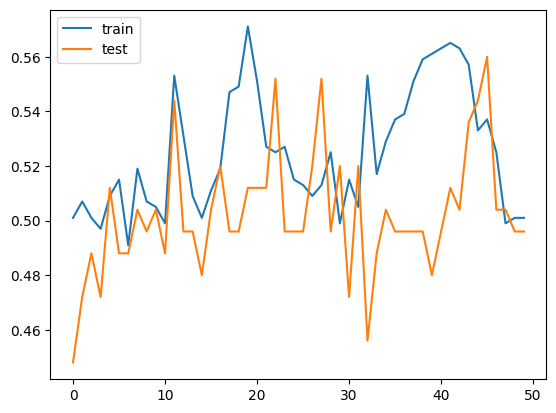

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 7500, 1)]         0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                16896     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [52]:
lr = 0.005 #learning rate
unit = 64 #unidades ocultas

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=erro,mode='auto',restore_best_weights=True,)
loss_fn = keras.losses.categorical_crossentropy

neuronios_cam_densa = 1 #neurônio na camada de saída

Entrada = Input(shape=[X_train.shape[1], X_train.shape[2]])

LSTM_gesto = LSTM(unit,return_sequences=False)(Entrada) #cria camada LSTM
output = Dense(neuronios_cam_densa, activation='sigmoid')(LSTM_gesto)

model = Model(inputs=Entrada, outputs=output)
opt = keras.optimizers.Adam(learning_rate=lr)  #método de otimização
model.compile(optimizer=opt, loss=BinaryCrossentropy(), metrics=[BinaryAccuracy()])


#treinamento da rede
history = model.fit(
    X_train, Y_train, #treina com os dados brutos normalizados
    epochs=50, #número de épocas de treinamento
    validation_split=0.2, #separa 20% dos dados de treinamento para utilizar como validação da rede
    shuffle = False,
    verbose= False
)

#plot treinamento
plt.plot(history.history['binary_accuracy'], label='train')
plt.plot(history.history['val_binary_accuracy'], label='test')
plt.legend()
plt.show()

#print do modelo
print(model.summary())

In [53]:
loss, acc = model.evaluate(X_test, Y_test,verbose=False) #Acurácia OK
print("")
print("Acurácia do conjunto de teste",acc)


Acurácia do conjunto de teste 0.5


shape (156, 7500, 1)
 


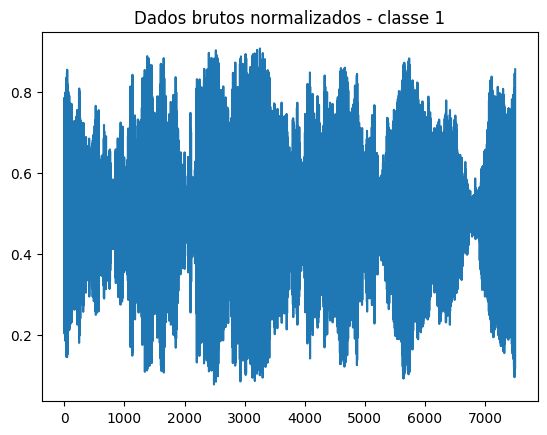

In [44]:
print("shape",X_test.shape)
print(" ")
plt.plot(X_test[0]);
plt.title("Dados brutos normalizados - classe 1");

## Próxima etapa: embarca o modelo